In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from ipywidgets import interactive, fixed
from IPython.display import display

In [5]:
from basis_fs import ipy_coexp  # Příklad 11

In [6]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 16
plt.rcParams["figure.figsize"] = (16, 6)

# Báze a promítání do nich (opakování)

Při promı́tánı́ vektoru do báze použijeme skalárnı́ násobenı́ vektorů, abychom dostali skalár, který nám
určuje souřadnici vektoru v dané bázi.

## Příklad 1

${\bf x} = \left [ \begin{array}{l} 2 \\ 3 \\ \end{array}\right ]
	~~~{\bf b_1} =  \left [ \begin{array}{l} 1 \\ 0 \\ \end{array}\right ]
	~~~{\bf b_2} =  \left [ \begin{array}{l} 0 \\ 1 \\ \end{array}\right ]$

In [7]:
x = np.array([2, 3])
b1 = np.array([1, 0])
b2 = np.array([0, 1])

In [8]:
# promitnuti do bazi
x1 = np.dot(x, b1)
x2 = np.dot(x, b2)

# promitnute souradnice
cx1 = b1 * x1
cx2 = b2 * x2

# synteza vektoru
synt_x = cx1 + cx2

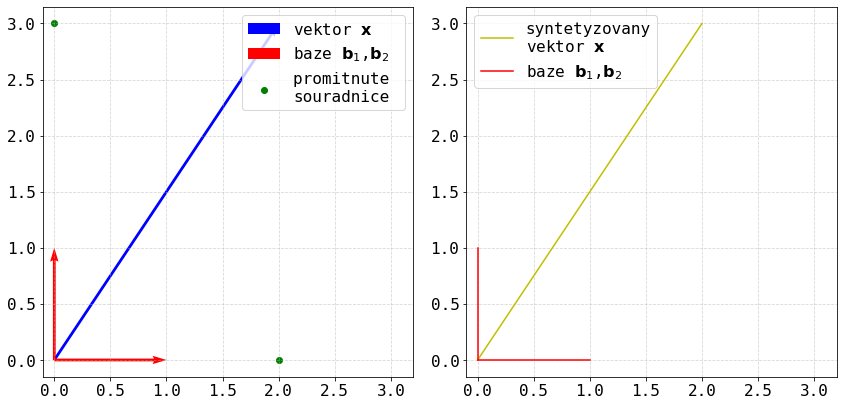

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
origin = [0, 0]

# plot vector, plt.quiver:
quiver_kwargs = {'angles': 'xy', 'scale_units': 'xy', 'scale': 1}
ax[0].quiver(*x, **quiver_kwargs, color='b', label='vektor $\mathbf{x}$')
ax[0].quiver(*b1, **quiver_kwargs,  color='r', label='baze $\mathbf{b}_1$,$\mathbf{b}_2$')
ax[0].quiver(*b2,  **quiver_kwargs, color='r')

ax[0].scatter(cx1[0], cx1[1], color='g', label='promitnute \nsouradnice')
ax[0].scatter(*cx2, color='g')

ax[0].grid(alpha=0.5, linestyle='--')
ax[0].axis('square')
ax[0].legend()

# nebo jako plt.plot:
ax[1].plot(*np.transpose([origin, synt_x]), color='y', label='syntetizovany\nvektor $\mathbf{x}$')
ax[1].plot(*np.transpose([origin, b1]), color='r', label='baze $\mathbf{b}_1$,$\mathbf{b}_2$')
ax[1].plot(*np.transpose([origin, b2]), color='r')

ax[1].grid(alpha=0.5, linestyle='--')
ax[1].axis('square')
ax[1].legend()

plt.tight_layout()

## Příklad 2

Teď si zkusı́me něco méně triviálı́ho. Pootočı́me souřadnou soustavu.

${\bf x} = \left [ \begin{array}{l} 2 \\ 3 \\ \end{array}\right ]
	~~~{\bf b_1} =  \left [ \begin{array}{l} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \\ \end{array}\right ]
	~~~{\bf b_2} =  \left [ \begin{array}{l} - \frac{1}{\sqrt{2}} \\  \frac{1}{\sqrt{2}} \\ \end{array}\right ]$

In [10]:
x = np.array([2, 3])
b1 = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
b2 = np.array([- 1 / np.sqrt(2), 1 / np.sqrt(2)])

In [11]:
# promitnuti do bazi
x1 = np.dot(x, b1)
x2 = np.dot(x, b2)

# promitnute souradnice
cx1 = b1 * x1
cx2 = b2 * x2

# synteza vektoru
synt_x = cx1 + cx2

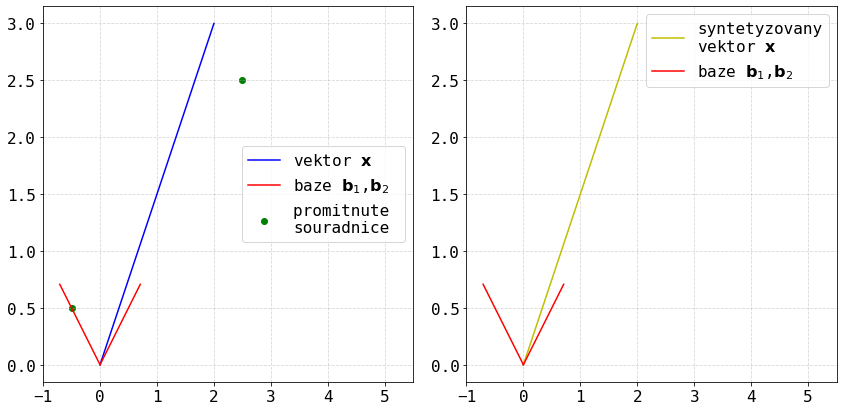

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
origin = [0, 0]

ax[0].plot(*np.transpose([origin, x]), color='b', label='vektor $\mathbf{x}$')
ax[0].plot(*np.transpose([origin, b1]), color='r', label='baze $\mathbf{b}_1$,$\mathbf{b}_2$')
ax[0].plot(*np.transpose([origin, b2]), color='r')

ax[0].scatter(cx1[0], cx1[1], color='g', label='promitnute \nsouradnice')
ax[0].scatter(cx2[0], cx2[1], color='g')

ax[0].grid(alpha=0.5, linestyle='--')
ax[0].set_xlim([-1,5.5])
ax[0].legend(loc='center right')

ax[1].plot(*np.transpose([origin, synt_x]), color='y', label='syntetizovany\nvektor $\mathbf{x}$')
ax[1].plot(*np.transpose([origin, b1]), color='r', label='baze $\mathbf{b}_1$,$\mathbf{b}_2$')
ax[1].plot(*np.transpose([origin, b2]), color='r')

ax[1].grid(alpha=0.5, linestyle='--')
ax[1].set_xlim([-1,5.5])
ax[1].legend()

plt.tight_layout()

## Příklad 3

Mějme 8-rozměrný vektor ${\bf x} = [3~~ 2~~ 1~~ 0~~ 1~~ 2~~ 3~~ 4]^T$ a báze ${\bf b_1} = \sqrt{\frac{1}{8}} [1~~1~~1~~1~~1~~1~~1~~1]^T$, ${\bf b_2}~=~[b_{21}~~b_{22}~~b_{23}~~...~~b_{28}]^T$, kde $b_{2n} = \sqrt{\frac{2}{8}} \cos(\frac{2\pi}{8} n)$

In [13]:
x = np.array([3, 2, 1, 0, 1, 2, 3, 4])
b1 = np.sqrt(1/8) * np.ones(x.shape)

n = np.arange(8)
b2 = np.sqrt(2/8) * np.cos(2*np.pi/8 * n)

In [14]:
xb1 = x * b1
xb2 = x * b2

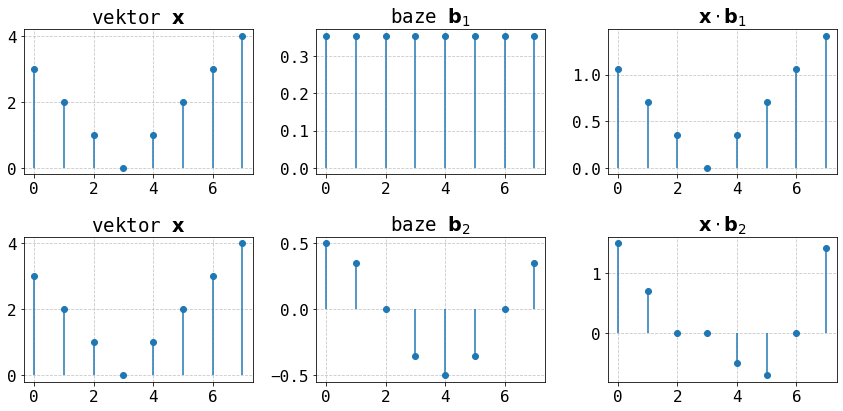

In [15]:
_, ax = plt.subplots(2, 3, figsize=(12, 6))

ax[0][0].stem(n, x, basefmt=' ')
ax[0][0].set_title('vektor $\mathbf{x}$')
ax[1][0].stem(n, x, basefmt=' ')
ax[1][0].set_title('vektor $\mathbf{x}$')

ax[0][1].stem(n, b1, basefmt=' ')
ax[0][1].set_title('baze $\mathbf{b}_1$')
ax[1][1].stem(n, b2, basefmt=' ')
ax[1][1].set_title('baze $\mathbf{b}_2$')

ax[0][2].stem(n, xb1, basefmt=' ')
ax[0][2].set_title('$\mathbf{x} \cdot \mathbf{b}_1$')
ax[1][2].stem(n, xb2, basefmt=' ')
ax[1][2].set_title('$\mathbf{x} \cdot \mathbf{b}_2$')

for _ax in ax.flatten():
    _ax.grid(alpha=0.7, linestyle='--')
plt.tight_layout()

Vektor $\mathbf{x}$ promitnuty do baze $\mathbf{b}_1$

In [16]:
np.sum(xb1)

5.6568542494923815

Vektor $\mathbf{x}$ promitnuty do baze $\mathbf{b}_2$

In [17]:
np.sum(xb2)

2.414213562373094

## Příklad 4

Podobnost cosinusovky $x(t) = \cos(2\pi t)$ a

a) stejnosměrného signálu $b_0(t) = 1$

b) cosinusovky $b_1(t) = \sqrt{2} \cos(2 \pi t)$

c) dvakrát rychlejší cosinusovky $b_2(t) = \sqrt{2} \cos(4\pi t)$

d) sinusovky $b_3(t) = \sqrt{2} sin(2\pi t)$

Podobnosti spočítáme jako $\int_0^1 x(t) b(t) dt$

In [18]:
n_aprx = 1000
t = np.linspace(0, 1, n_aprx)
x = np.cos(2 * np.pi * t)

In [19]:
b0 = np.ones(x.shape)
b1 = np.sqrt(2) * np.cos(2 * np.pi * t)
b2 = np.sqrt(2) * np.cos(4 * np.pi * t)
b3 = np.sqrt(2) * np.sin(2 * np.pi * t)

b = [b0, b1, b2, b3]

In [20]:
xb0 = x * b0
xb1 = x * b1
xb2 = x * b2
xb3 = x * b3

xb = [xb0, xb1, xb2, xb3]  # nebo zkráceně: xb = x * b

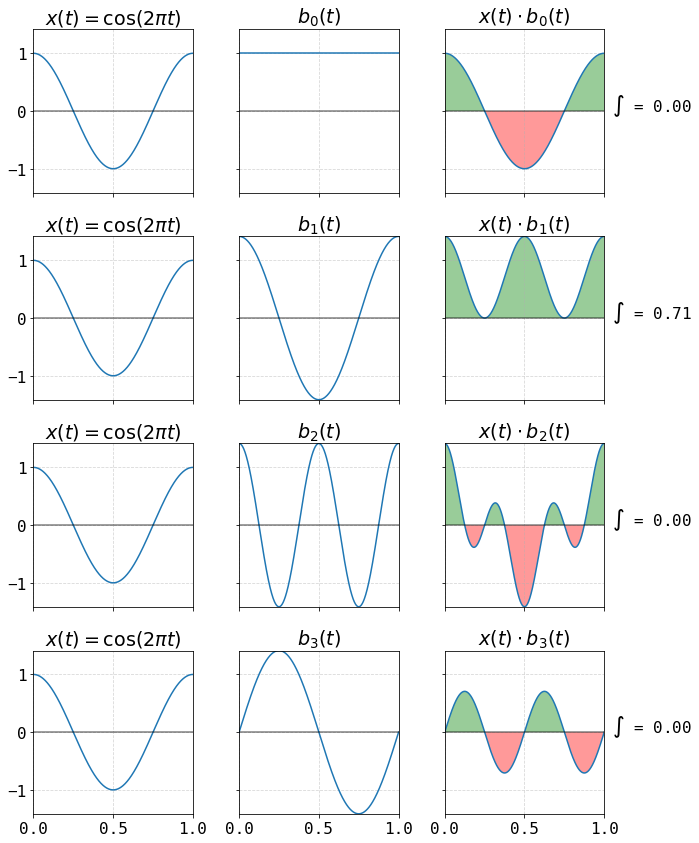

In [21]:
f, ax = plt.subplots(len(b), 3, figsize=(10, 12), sharex=True, sharey=True)

for i in range(len(b)):
    ax[i][0].plot(t, x)
    ax[i][0].set_title('$x(t) = \cos(2\pi t)$')

    ax[i][1].plot(t, b[i])
    ax[i][1].set_title(f'$b_{i}(t)$')

    ax[i][2].plot(t, xb[i])
    ax[i][2].set_title(f'$x(t)\cdot b_{i}(t)$')
    ax[i][2].fill_between(t, xb[i], 0, where=(xb[i] > 0), facecolor='g', alpha=0.4)
    ax[i][2].fill_between(t, xb[i], 0, where=(xb[i] < 0), facecolor='r', alpha=0.4)
    
    # vypočteme podobnost:
    pod = np.sum(xb[i]) / n_aprx  # numerický integrál
    ax[i][2].text(1.05, 0, f'$\int$ = {pod:.2f}')

for _ax in ax.flatten():
    _ax.set_xlim(0, 1)
    _ax.set_ylim(np.min(xb), np.max(xb))
    _ax.plot([0, 1], [0, 0], 'k', alpha=0.5)
    _ax.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

## Příklad 5

Podobnost cosinusovky se sinusovkou vyšla nulová, takže se nepodobají. Zkusíme tedy teď podobnost se sinusovkou i cosinusovkou:
$$ x(t) = \cos(2 \pi t - \pi / 5) $$
$$ b_1(t) = \sqrt{2} \cos(2\pi t) $$
$$ b_2(t) = \sqrt{2} \sin(2\pi t) $$

Souřadnice (koeficienty) funkce $x$ pro obě báze vypočteme:
$$ cb_1 = \int x(t) b_1(t) dt $$
$$ cb_2 = \int x(t) b_2(t) dt $$

Zpětně signál nasyntetizujeme jako:
$$ x^*(t) = cb_1 \cdot b_1(t) + cb_2 \cdot b_2(t) $$

In [22]:
n_aprx = 1000
t = np.linspace(0, 1, n_aprx)
x = np.cos(2*np.pi*t - np.pi/5)

In [23]:
b1 = np.sqrt(2) * np.cos(2 * np.pi * t)
b2 = np.sqrt(2) * np.sin(2 * np.pi * t)

b = [b1, b2]

xb1 = x * b1
xb2 = x * b2

xb = [xb1, xb2]

In [24]:
cb1 = np.sum(xb1) / n_aprx
cb2 = np.sum(xb2) / n_aprx
x_synt = cb1 * b1 + cb2 * b2

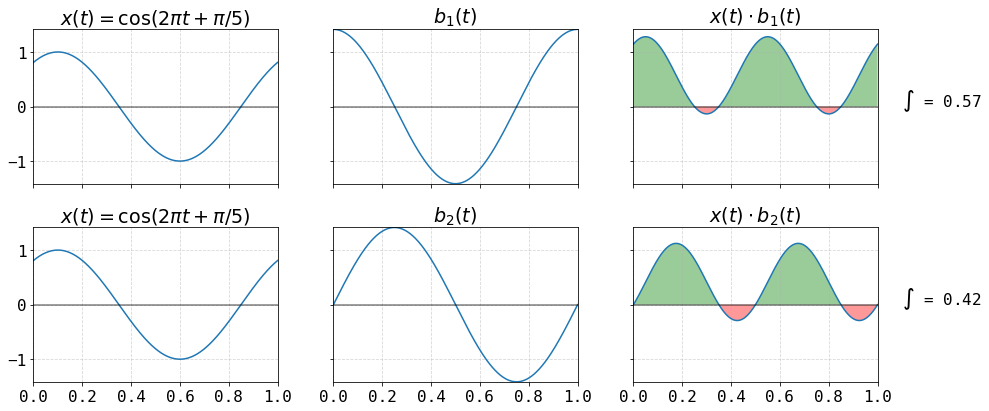

In [25]:
f, ax = plt.subplots(len(b), 3, figsize=(14, 6), sharex=True, sharey=True)

for i in range(len(b)):
    ax[i][0].plot(t, x)
    ax[i][0].set_title('$x(t) = \cos(2\pi t + \pi / 5)$')

    ax[i][1].plot(t, b[i])
    ax[i][1].set_title(f'$b_{i+1}(t)$')

    ax[i][2].plot(t, xb[i])
    ax[i][2].set_title(f'$x(t)\cdot b_{i+1}(t)$')
    ax[i][2].fill_between(t, xb[i], 0, where=(xb[i] > 0), facecolor='g', alpha=0.4)
    ax[i][2].fill_between(t, xb[i], 0, where=(xb[i] < 0), facecolor='r', alpha=0.4)
    
    pod = np.sum(xb[i]) / n_aprx
    ax[i][2].text(1.1, 0, f'$\int$ = {pod:.2f}')
    
for _ax in ax.flatten():
    _ax.set_xlim(0, 1)
    _ax.set_ylim(np.min(b), np.max(b))
    _ax.plot([0, 1], [0, 0], 'k', alpha=0.5)
    _ax.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

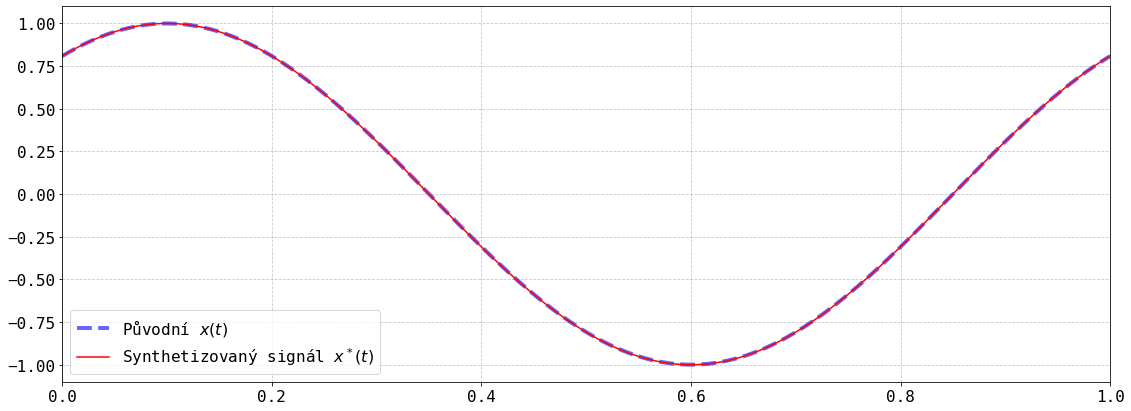

In [26]:
plt.plot(t, x, 'b--', alpha=0.6, linewidth=4, label='Původní $x(t)$')
plt.plot(t, x_synt, 'r', label='Synthetizovaný signál $x^*(t)$')

plt.legend()
plt.xlim(t.min(), t.max())
plt.grid(alpha=0.7, linestyle='--')
plt.tight_layout()

Získali jsme tedy 2 koeficienty, které nám udávají souřadnice funkce $x(t)$ v bázovém prostoru daném funkcemi $b_1(t)$, $b_2(t)$.
Jaký je závěr?

1. pro $b_1(t)$: je to podobné.
2. pro $b_2(t)$: je to také podobné, ale o něco méně.

Když jsme potom tyto souřadnice zpátky promítli přes tyto báze, dostali jsme původní funkci. 

Tyto souřadnice nám však určují pouze amplitudu sinu a consinu. 
Jak tedy můžeme jejich spojením získat zadanou funkci $x$, posunutý sinus?
Když totiž sčítáme sinus a cosinus, přičemž každý vynásobíme nějakou "vahou", 
výsledná funkce bude různě posunutý sinus (nebo cosinus) s různou amplitudou.
Vahami pro sinus a cosinus tedy určujeme nejen amplitudu výsledné funkce,
ale také její posunutí.

## Příklad 6

Teď si ukážeme, jako se to dělá elegantněji pomocí komplexních exponenciál. 
Báze bude:
$$
b_1(t) = e^{j\omega_1 t} = \cos \omega_1 t + j\sin \omega_1 t
$$

Koeficient, se kterým budeme do této báze promítat, vypočteme: 
$$
c_1 = \int x(t) b_1^{\star}(t) dt
$$
(báze musí být komplexně sdružená).

Když však vynásobíme koeficient $c_1$ s bází $b_1$, nedostaneme ještě původný signál. Výsledný signál bude komplexní. Přidáme tedy ještě jednu bázi, která bude s $b_1$ komplexně sdružená:
$$
b_{-1}(t) = e^{-j\omega_1 t} = \cos \omega_1 t - j\sin \omega_1 t
$$
Její koeficient pak bude: 
$$
c_{-1} = \int x(t) b_{-1}^{\star}(t) dt
$$

Poznámka: více se o komplexních exponenciálách dozvíme v následující kapitole o Fourierově řadě.

In [27]:
n_aprx = 1000
t = np.linspace(0, 1, n_aprx)
x = np.cos(2 * np.pi * t - np.pi/5)

Báze pomocí komplexních exponenciál

In [28]:
b1 = np.exp(2 * np.pi * 1j * t)
b1m = np.exp(- 2* np.pi * 1j * t)

In [29]:
c1 = np.dot(x, np.conj(b1)) / n_aprx
c1m = np.dot(x, np.conj(b1m)) / n_aprx

In [30]:
c1, c1m

((0.40491300568466126-0.2935987335200902j),
 (0.40491300568466126+0.2935987335200902j))

Báze pomocí sinusu a cosinusu

In [31]:
b1 = np.cos(2 * np.pi * t) + 1j * np.sin(2 * np.pi * t)
b1m = np.cos(2 * np.pi * t) - 1j * np.sin(2 * np.pi * t)

In [32]:
c1 = np.dot(x, np.conj(b1)) / n_aprx
c1m = np.dot(x, np.conj(b1m)) / n_aprx

In [33]:
c1, c1m

((0.40491300568466126-0.2935987335200902j),
 (0.40491300568466126+0.2935987335200902j))

## 2 Fourierova řada

FŘ vyjadřuje libovolný periodický signál jako sumu komplexních
exponenciál:

$$
x(t) = \sum_{k= -\infty}^{+\infty} c_k  e^{jk\omega_1 t},
$$

kde $\omega_1 = \frac{2\pi }{T_1}$ je základní kruhová frekvence
signálu a $c_k$ jsou koeficienty FŘ. Ty se spočítají: 

$$
c_k = \frac{1}{T_1} \int_{T_1} x(t) e^{-jk\omega_1 t} dt.
$$

<b>Pro hloubavé:</b> $c_k$ je tedy komplexní číslo a můžeme ho např. pro $k$=1 rozepsat na reálnou a imaginární složku,
$c_1 = c_1^{\cos} - j c_1^{\sin}$ a pro $k$=-1 na $c_{-1} = c_1^{\cos} + j c_1^{\sin}$.
$c_1$ a $c_{-1}$ jsou komplexně sdružené, tedy se liší pouze v znaménku imaginární zložky.
Když sečteme komplexní exponenciály pro $k$=$\pm1$, dostaneme:
$$
 x(t) = (c_1^{\cos} - j c_1^{\sin})  e^{j\omega_1 t} + (c_1^{\cos} + j c_1^{\sin})  e^{-j\omega_1 t},
$$
pak rozepíšeme komplexní exponenciálu:
$$
 x(t) = (c_1^{\cos} - j c_1^{\sin})  (\cos \omega_1 t + j\sin \omega_1 t) + (c_1^{\cos} + j c_1^{\sin}) (\cos \omega_1 t - j\sin \omega_1 t) 
$$
po roznásobení nám zůstane:
$$
 x(t) = 2 c_1^{\cos} \cos \omega_1 t + 2 c_1^{\sin} \sin \omega_1 t
$$

Znovu jsme tedy dostali, podobně jako v příkladu 5, směs cosinusovky a sinusovky s vahami $c_1^{\cos}$ (reálná zložka) a $c_1^{\sin}$ (imaginární zložka),
kterou dokážeme popsat libovolně posunutou sinusovku nebo cosinusovku s libovolnou amplitudou. 
To samé platí i pro $k > 1$ a $k < -1$ s tím, že $k$ musíme přidat všude, k výrazu $\omega_1 t$. 
Pro $k$=$0$ nám pro $x(t)$ zůstane pouze reálná část koeficientu $c_0$, udávající stejnosměrnou složku výsledného signálu $x(t)$.

V těchto laboratořích se budeme zabývat FŘ velmi typických signálů:
periodických sledů obdélníkových impulsů. Takový signál je nadefinován
jako 

$$
x(t) = \left\{ 
  \begin{array}{ll}
      D & {pro}~~ -\frac{\vartheta}{2} \le t \le \frac{\vartheta}{2} \\
      0 & {pro}~~ -\frac{T_1}{2} \le t < -\frac{\vartheta}{2}
           ~~{a}~~  \frac{\vartheta}{2} < t \le \frac{T_1}{2}\\ 
  \end{array}\right .  
$$

s periodou $T_1$. Z přednášek víme, že jeho koeficienty FŘ se dají
spočítat analyticky: 

$$
c_k = D\frac{\vartheta}{T_1}{sinc} \left(\frac{\vartheta}{2}k\omega_1\right). 
$$

Koeficienty Fourierovy řady budeme počítat třemi způsoby:
1. Budeme pouze zobrazovat koeficienty vypočtené podle teoretického
  vztahu. 
2. Vygenerujeme ručně funkce  $e^{-jk\omega_1 t}$ (komplexně sdružené báze) a budeme do nich promítat
  signál - násobit a integorvat (čti sčítat) přes jednu periodu.
3. Použijeme funkci `fft` a ukážeme si, že sice koeficienty
  počítá, ale s jistými problémy, 

## Příklad 7

Mějme sled  obdélníkových  impulsů  $x(t)$ s parametry: $D = 6,\ T_1 = 1~\mu s,\ \vartheta = 0.25~\mu s$. Zobrazíme si jeho jednu periodu.

In [34]:
D = 6
T1 = 1e-6
theta = 0.25e-6

In [35]:
n_aprx = 1000
t = np.linspace(-T1/2, T1/2, n_aprx)
x = np.zeros(t.shape)

where = np.logical_and(t > -theta/2, t < theta/2)
x[where] = D

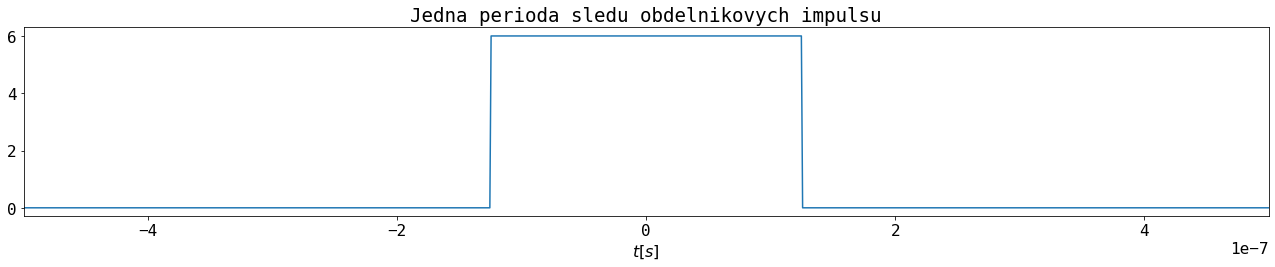

In [36]:
plt.figure(figsize=(18, 4))
plt.plot(t, x)

plt.title('Jedna perioda sledu obdelnikovych impulsu')
plt.xlabel('$t [s]$')
plt.xlim(t.min(), t.max())
plt.tight_layout()

## Příklad 8

Vypočítáme koecificienty $c_k$ podle vzorečku, pro 
$$ 
k \in [-20,20]. 
$$ 
Pak zobrazíme jejich modul a argument na příslušných
kruhových frekvencích:

In [37]:
omega1 = 2 * np.pi / T1
k = np.arange(-20, 21)
ck = D * theta / T1 * np.sinc (theta /2 * k * omega1 / np.pi);

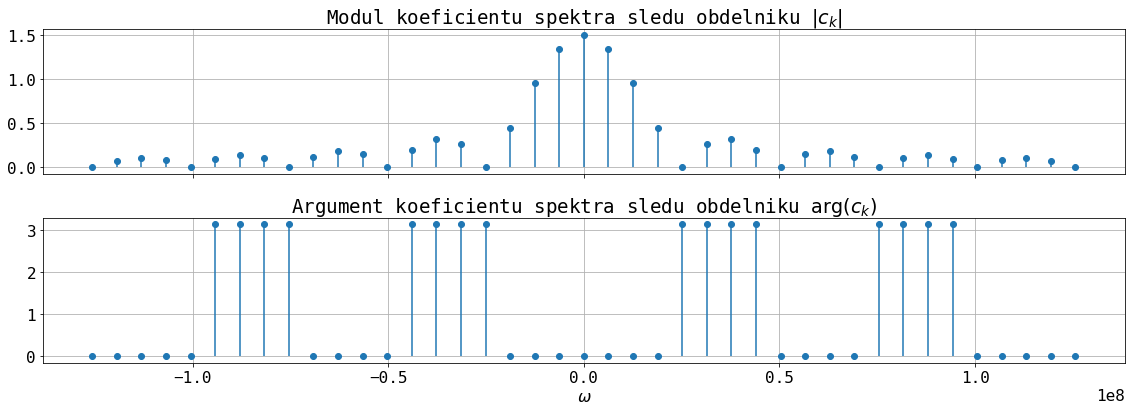

In [38]:
f, ax = plt.subplots(2, 1, sharex=True)

ax[0].stem(k * omega1, np.abs(ck), basefmt=' ')
ax[0].set_title('Modul koeficientu spektra sledu obdelniku $|c_k|$')
ax[0].grid()

ax[1].stem(k * omega1, np.angle(ck), basefmt=' ')
ax[1].set_title('Argument koeficientu spektra sledu obdelniku $\mathrm{arg}(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].grid()

plt.tight_layout()

## Příklad 9

Vypočítáme koeficienty $c_k$ ''ručně'' pomocí generování komplexních exponenciál $e^{-jk\omega_1 t}$.

In [39]:
ck_gen = []

for kk in k:
    expo = np.exp(- 1j * kk * omega1 * t)
    # '* T1 / n_aprx' -> aproximace integralu, pomoci n_aprx bodu v intervalu dlouhem T1:
    ck_gen.append(1 / T1 * np.dot(x, expo) * T1 / n_aprx)

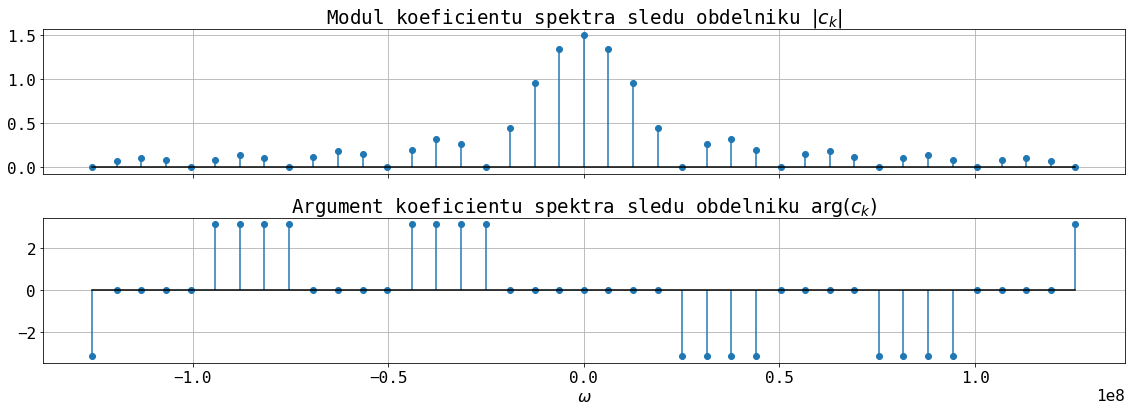

In [40]:
f, ax = plt.subplots(2, 1, sharex=True)

ax[0].stem(k * omega1, np.abs(ck_gen), basefmt='k')
ax[0].set_title('Modul koeficientu spektra sledu obdelniku $|c_k|$')
ax[0].grid()

angle = np.angle(ck_gen) # np.where(np.angle(ck_gen) < 0, np.angle(ck_gen), np.angle(ck_gen) + 2*np.pi)
ax[1].stem(k * omega1, angle, basefmt='k')
ax[1].set_title('Argument koeficientu spektra sledu obdelniku $\mathrm{arg}(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].grid()

plt.tight_layout()

## Příklad 10

Zkuste vypočítat koeficienty FŘ pomocí rychlé Fourierovy transformace (fast Fourier transform – FFT).
O FFT se dozvíme později.

In [41]:
X = np.fft.fft(x)
N = len(X)

ck_fft = X / N
omegaf = np.arange(N) * omega1

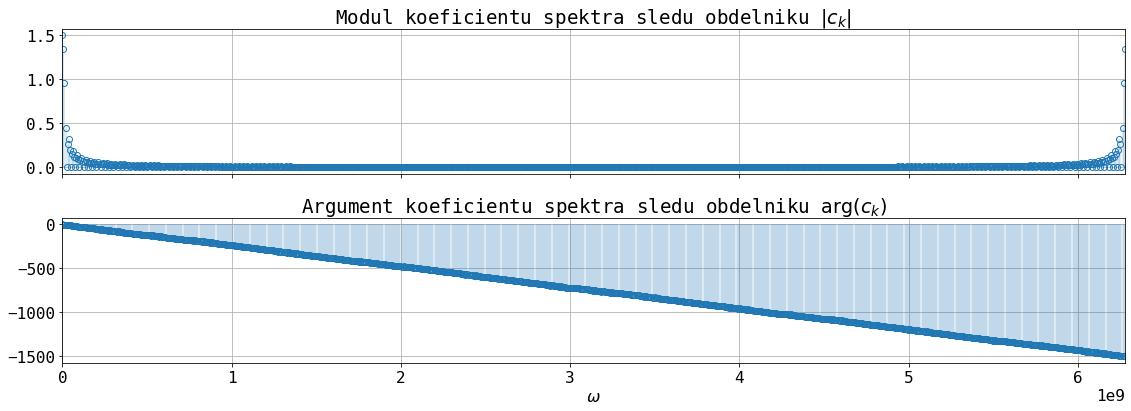

In [42]:
f, ax = plt.subplots(2, 1, sharex=True)

markerline, stemlines, baseline = ax[0].stem(omegaf, np.abs(ck_fft), basefmt=' ', use_line_collection=True)
stemlines.set_linewidth(0.3)
markerline.set_fillstyle('none')
ax[0].set_title('Modul koeficientu spektra sledu obdelniku $|c_k|$')
ax[0].grid()

markerline, stemlines, baseline = ax[1].stem(omegaf, np.unwrap(np.angle(ck_fft)), basefmt=' ')
stemlines.set_linewidth(0.3)
markerline.set_fillstyle('none')
ax[1].set_title('Argument koeficientu spektra sledu obdelniku $\mathrm{arg}(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(omegaf.min(), omegaf.max())
ax[1].grid()

plt.tight_layout()

## Příklad 11

Ukážeme, jak se obdélníkový signál skládá z jednotlivých komponentů $c_k  e^{jk\omega_1 t}.$ Začneme stejnosměrnou složkou $c_0$ a pak postupně přidáme pro $k=\pm 1,~~ k=\pm 2, \ldots$. Pro každý krok vykreslíme komplexní exponenciály, jejich součet a sumu
všeho.

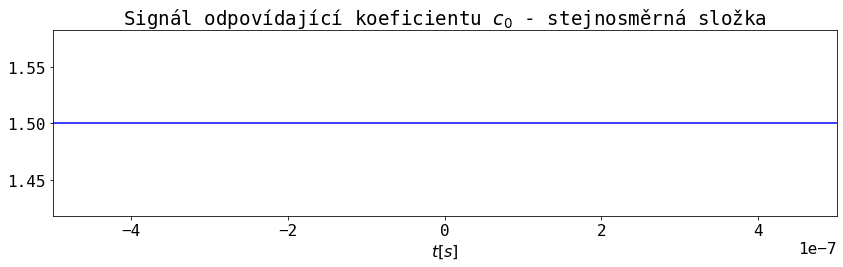

In [43]:
i_zero = np.where(k == 0)[0][0]

# coefficient c_0 - DC component
x_synt = ck[i_zero] * np.ones(x.shape)

plt.figure(figsize=(12, 4))
plt.xlabel('$t[s]$')
plt.title('Signál odpovídající koeficientu $c_0$ - stejnosměrná složka')
plt.plot(t, x_synt, 'b')

plt.xlim(t.min(), t.max())
plt.tight_layout()

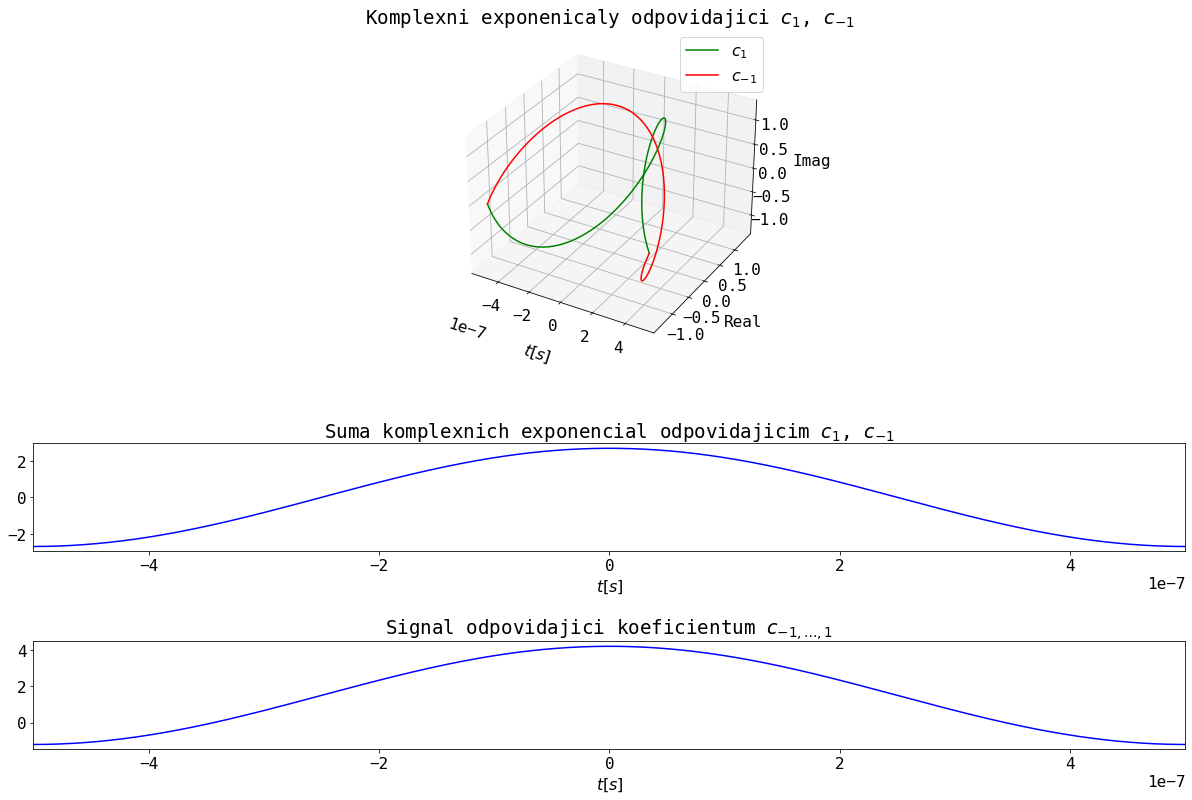

In [44]:
# coefficient c_0 - DC component
x_synt = ck[i_zero] * np.ones(t.shape)

for kk in [1]:  # coefficients: c_-1, c_1,
    expo_pos = ck[i_zero + kk] * np.exp(+1j * omega1 * t)
    expo_neg = ck[i_zero - kk] * np.exp(-1j * omega1 * t)
    expo_sum = (expo_pos + expo_neg).real.astype(float)
    x_synt += expo_sum

spec = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 1, 1])
 
kk = 1                   
f = plt.figure(figsize=(16, 10))
ax0 = f.add_subplot(spec[0], projection='3d')
ax0.plot(t, np.real(expo_pos), np.imag(expo_pos), 'g', label=f'$c_{{ {kk}}}$')
ax0.plot(t, np.real(expo_neg), np.imag(expo_neg), 'r', label=f'$c_{{ {-kk}}}$')
ax0.legend()
ax0.set_title(f'Komplexni exponenicaly odpovidajici $c_{{ {kk}}}$, $c_{{-{kk}}}$')

ax0.grid()
ax0.set_xlabel('$t[s]$', labelpad=15)
ax0.set_ylabel('Real', labelpad=15)
ax0.set_zlabel('Imag', labelpad=15)

ax1 = f.add_subplot(spec[1])
ax1.plot(t, expo_sum, 'b')
ax1.set_title(f'Suma komplexnich exponencial odpovidajicim $c_{{ {kk}}}$, $c_{{-{kk}}}$')
ax1.set_xlabel('$t[s]$')
ax1.set_xlim(t.min(), t.max())

ax2 = f.add_subplot(spec[2])
ax2.plot(t, x_synt, 'b')
ax2.set_title(f'Signal odpovidajici koeficientum $c_{{-{kk}, \dots , {kk}}}$')
ax2.set_xlabel('$t[s]$')
ax2.set_xlim(t.min(), t.max())

plt.subplots_adjust(right=1, left=0, top=1, bottom=0, hspace=0.5) 

Pokud v bloku kódu výše upravíme `for` cyklus na:

`for kk in (1, k+1):` začneme signál syntetizovat přes koeficienty: $c_{-k}, ..., c_{-1}, c_{1}, ..., c_{k}$.

Upravený kód je uložen ve funkci `ipy_coexp` pro vytvoření slider-u pro `k`.

In [45]:
fixed_params = {'ck': ck, 'i_zero': i_zero, 't': t, 'omega1': omega1}

iplot_coexp = interactive(
    ipy_coexp, 
    k=(1, 20),
    params=fixed(fixed_params),
    continuous_update=False,
)
iplot_coexp.children[-1].layout.height="800px"

In [46]:
display(iplot_coexp)

interactive(children=(IntSlider(value=2, description='k', max=20, min=1), Output(layout=Layout(height='800px')…

## Příklad 12 (nepovinné)

Analýza slunečních skrvn. Data v `sunspot.npy` jsou transformací původních dat `sunspot.dat` poskytnutých k cvičení v MATLABu.
Tyto dva poslední příklady se zabývají analýzou signálu pomocí FFT.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/NASA%27s_SDO_Observes_Largest_Sunspot_of_the_Solar_Cycle_%2815430820129%29.jpg" alt="drawing" width="400"/>

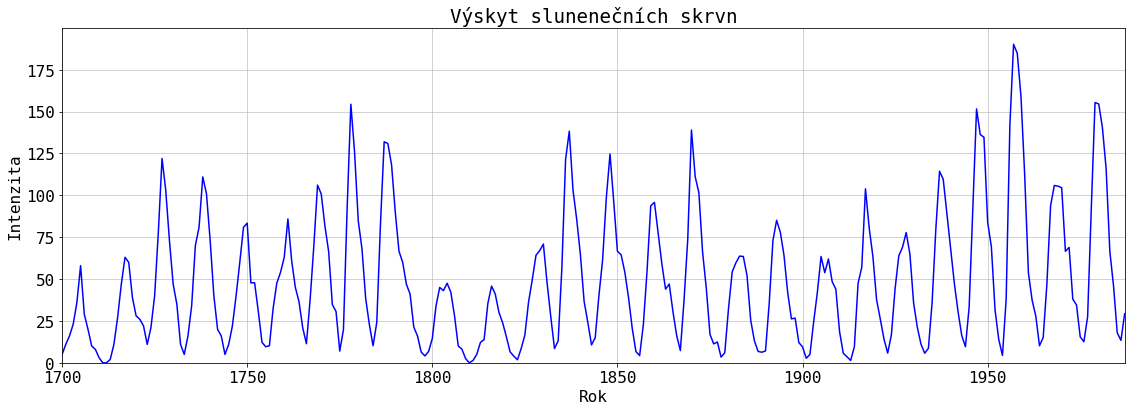

In [47]:
# načtení a zobrazení dat
sun = np.load('sunspot.npy', allow_pickle=True)

year = sun.item()['year']
sunspot = sun.item()['sunspot']

plt.plot(year, sunspot, 'b')
plt.title('Výskyt slunenečních skrvn')
plt.xlabel('Rok')
plt.ylabel('Intenzita')

plt.xlim(min(year), max(year))
plt.ylim(0)
plt.grid('--', alpha=0.7)
plt.tight_layout()

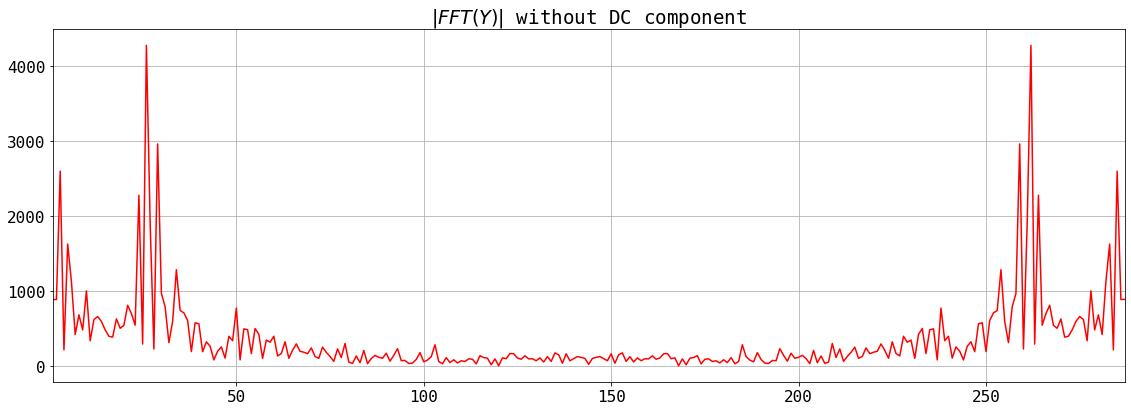

In [48]:
# Fourierova transformace
Y = np.fft.fft(sunspot)
Y = Y[1:]  # prvni prvek je pouze suma vektoru sunspot, odstranime ho

plt.title('$|FFT(Y)|$ without DC component')
plt.plot(np.arange(1, Y.size+1, 1), abs(Y), 'r')
plt.xlim(1, Y.size)

plt.grid()
plt.tight_layout()

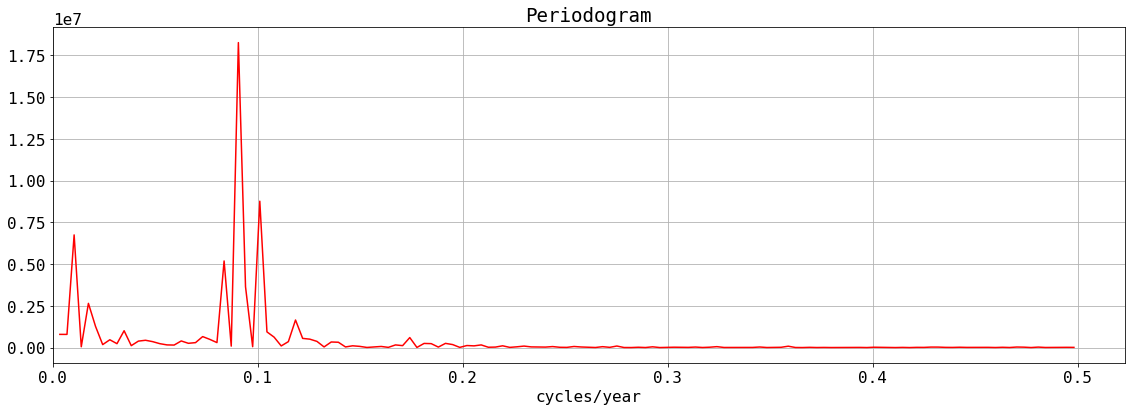

In [49]:
# zobrazeni vykonu na frekvencich
N = len(Y)
power = abs(Y[:N//2])**2   # staci nam pouze polovina hodnot Y

nyquist = 1/2
freq = np.arange(1, N//2 + 1) / (N/2) * nyquist

plt.plot(freq, power, 'r')
plt.title('Periodogram')
plt.xlabel('cycles/year')
plt.grid()
plt.xlim(0)
plt.tight_layout()

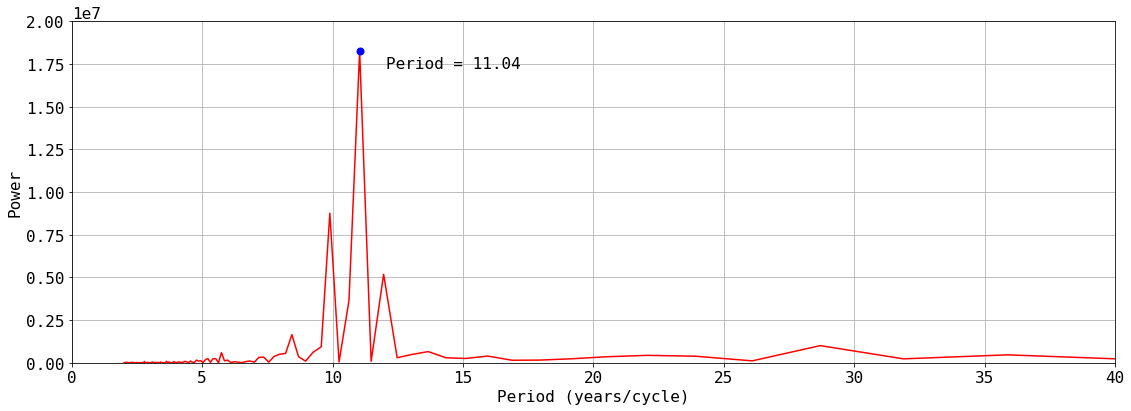

In [50]:
# x-ova osa v jednotce 'rok'
period = 1. / freq
plt.plot(period, power, 'r')

plt.axis([0, 40, 0, 2e+7])
plt.xlabel('Period (years/cycle)')
plt.ylabel('Power')
plt.grid()

# nalezeni frekvence s maximalnim vykonem
index, = np.where(power == max(power))
index = index[0]

plt.plot(period[index], power[index], 'b.', markersize=14)
plt.text(period[index]+1, power[index]-1E6, f'Period = {period[index]:.2f}')
plt.tight_layout()

## Příklad 13 (nepovinné)

Analýza zašuměného signálu.

In [51]:
t = np.linspace(0, .25, 251)
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)  # original

# add noise:
y = x + 1.4*np.random.normal(size=t.size)  # gaussian distribution

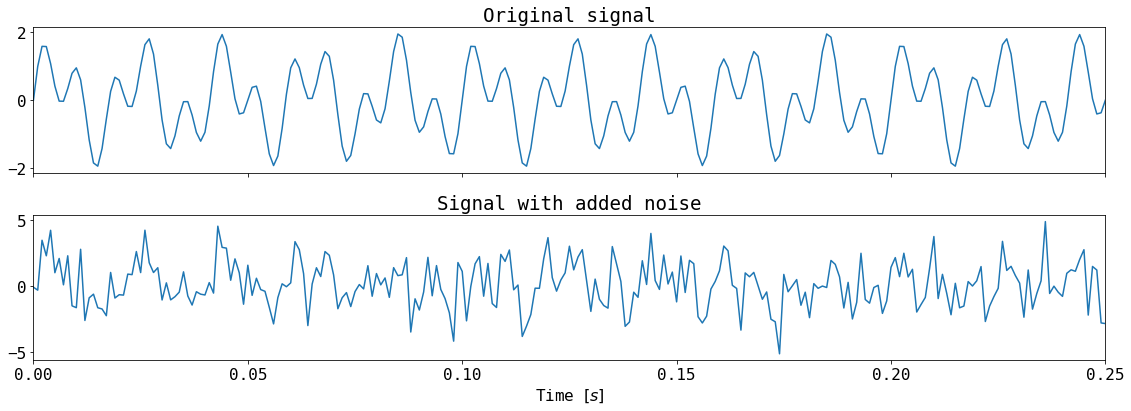

In [52]:
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

ax0.plot(t, x)
ax0.set_title('Original signal')
ax0.set_xlim(t.min(), t.max())

ax1.plot(t, y)
ax1.set_title('Signal with added noise')
ax1.set_xlabel('Time $[s]$')
ax1.set_xlim(t.min(), t.max())

plt.tight_layout()

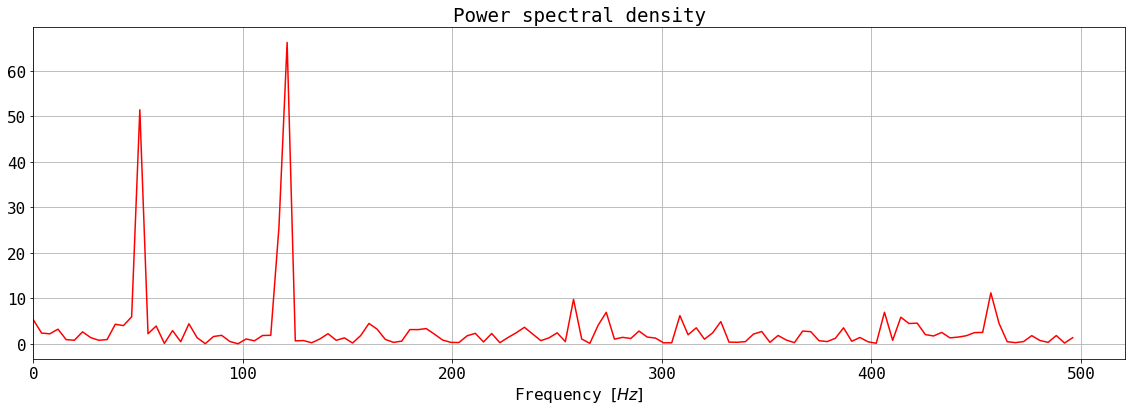

In [53]:
N = 256  # N > y.size
 
# Fourierova transformace
Y = np.fft.fft(y, n=N)
psd = (abs(Y)**2) / N  # nebo:  psd = Y * np.conj(Y) / N

frequency = np.arange(128) * 1_000/N  # stačí nám prvních 128 hodnot, zbytek je symetrický

plt.plot(frequency, psd[:128], 'r')
plt.title('Power spectral density')
plt.xlabel('Frequency $[Hz]$')
plt.xlim(0)
plt.grid()
plt.tight_layout()

In [54]:
frequency[psd[:128] > 25]  # frekvence s výkonem nad 25

array([ 50.78125, 117.1875 , 121.09375])

Více se o PSD dozvíte v náhodných signálech a přednáškách.